# EJERCICIOS

## 03_02 Analisis de datos: Bivariante, Exploratory Data Analysis

#### 1. Carga y prepara el dataset del Titanic para hacer un análisis Bivariante. Tomátelo como un EDA. Al igual que durante el curso, el análisis central es la supervivencia para los distintos tipos de tripulantes. Lo vamos a hacer de forma no guiada. Escribe todas tus conclusiones a lo largo del notebook. 

Explica la diferencia entre correlación y dependencia (puedes apoyarte en un ejemplo que no tenga que ver con el Titanic).

Adelantándonos en el temario, responde a la siguiente pregunta: si añadimos a un modelo de clasificación una variable de la que sabemos que no tiene dependencia nuestro target pero que sí correla, ¿mejora o empeora la varianza?


In [1]:

import pandas as pd
import seaborn as sns

from bootcampviztools import *
from scipy.stats import chi2_contingency, mannwhitneyu
import matplotlib.pyplot as plt

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head(40)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False



Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace= True)

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df_titanic["family_members"] = df_titanic['parch'] + df_titanic['sibsp']
df_titanic = df_titanic.drop(["parch","sibsp"], axis = 1)


Imputa la moda a los valores nulos de "embark_town"

In [6]:
df_titanic.loc[df_titanic['embark_town'].isna(), "embark_town"] = df_titanic['embark_town'].mode()[0]

In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [8]:
df_titanic['age_who']=df_titanic.groupby('who')['age'].transform("mean")
df_titanic.head(20)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_who
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1,33.173123
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,32.000000
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,32.000000
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,32.000000
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0,33.173123
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0,33.173123
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0,33.173123
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4,6.369518
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2,32.000000
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1,6.369518


In [9]:
df_titanic.loc[df_titanic['age'].isna(),"age"]=df_titanic.loc[df_titanic['age'].isna(),"age_who"]

In [10]:
df_titanic.drop("age_who",axis=1,inplace=True)

In [11]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

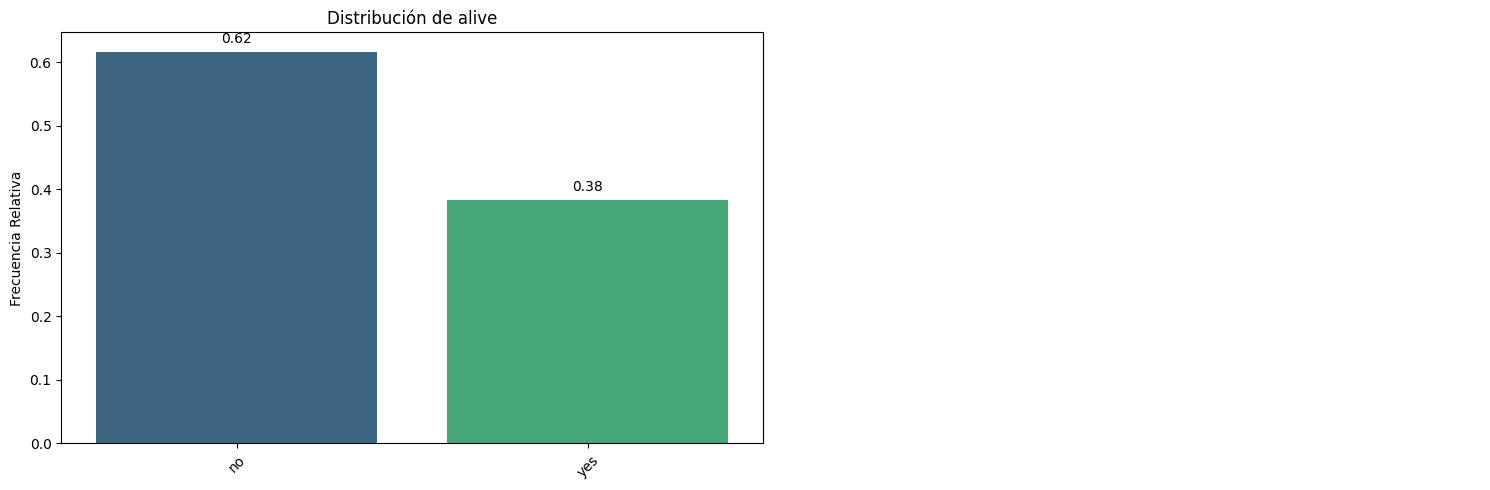

In [12]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)

In [13]:
df_titanic.groupby(["alive","who"])[["age","fare"]].mean().round(1)#.sort_values('fare')

age  fare
alive who              
no    child   7.2  32.6
      man    33.0  21.5
      woman  30.9  21.0
yes   child   5.8  32.9
      man    33.9  42.1
      woman  32.4  54.8

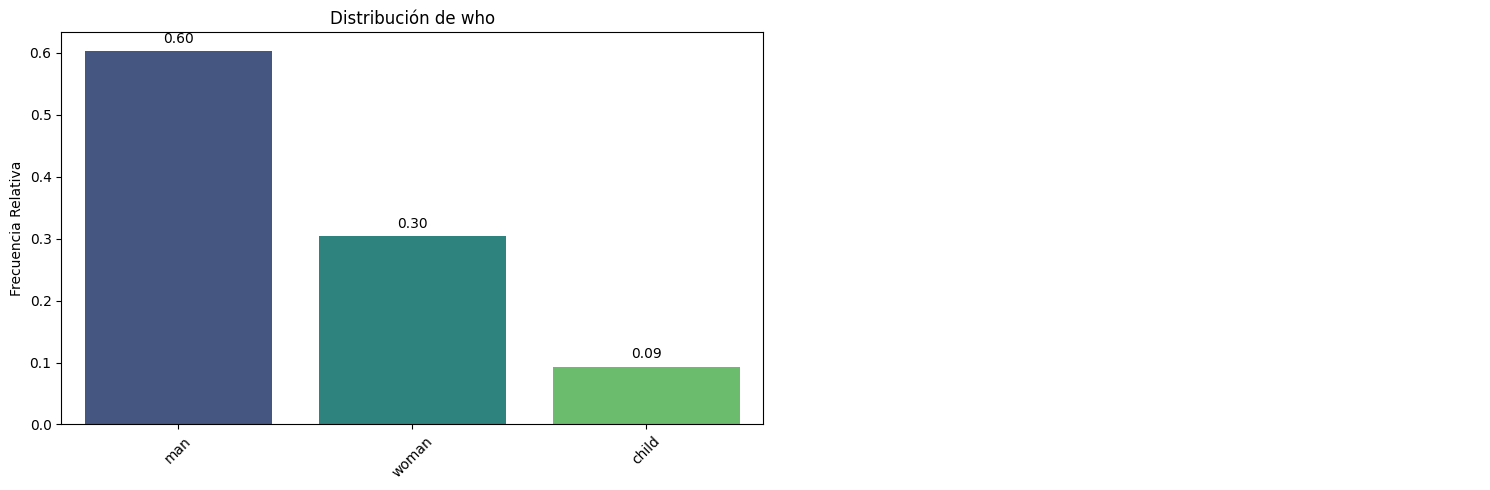

In [14]:
pinta_distribucion_categoricas(df_titanic,["who"], relativa= True, mostrar_valores= True)

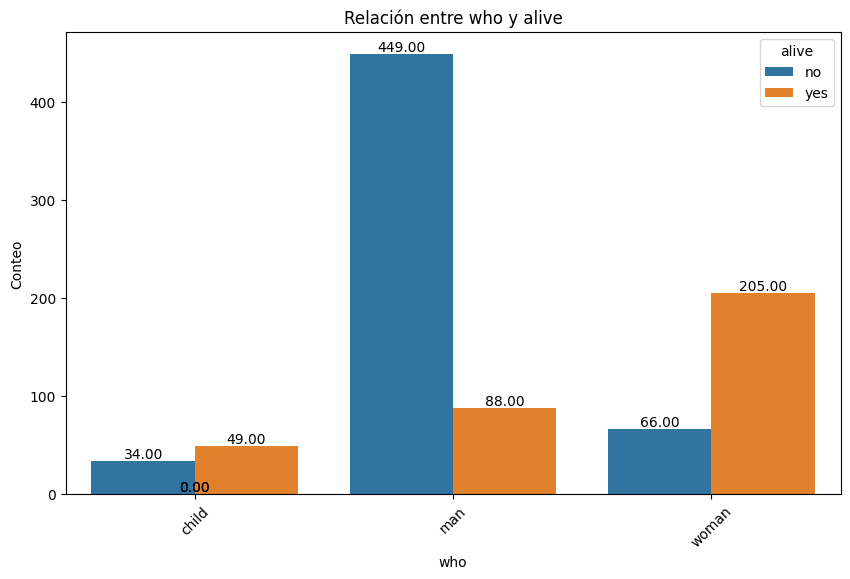

In [15]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True)

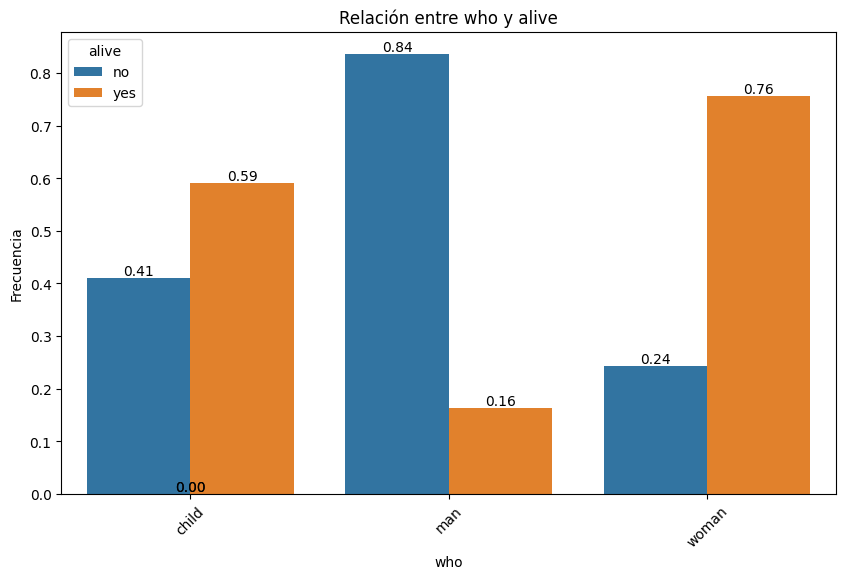

In [16]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True, relative_freq=True)

In [17]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["who"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


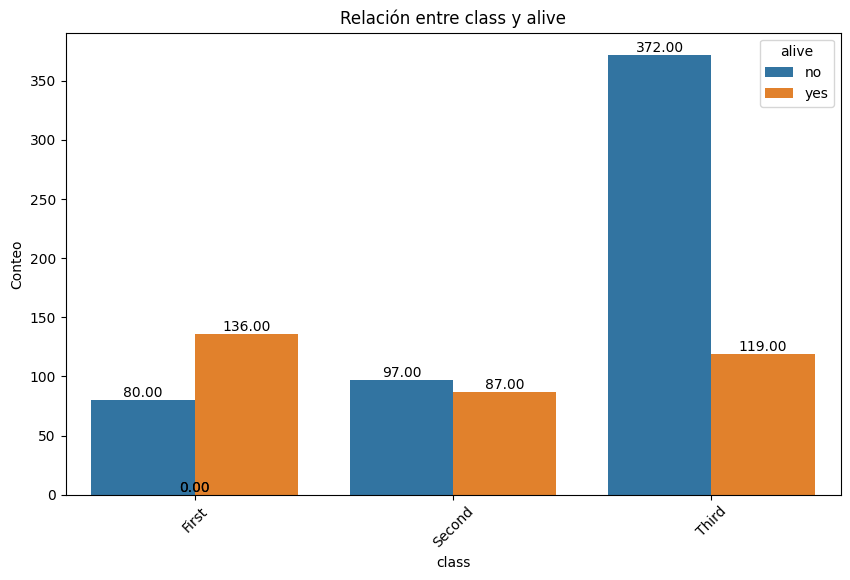

In [18]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values = True)

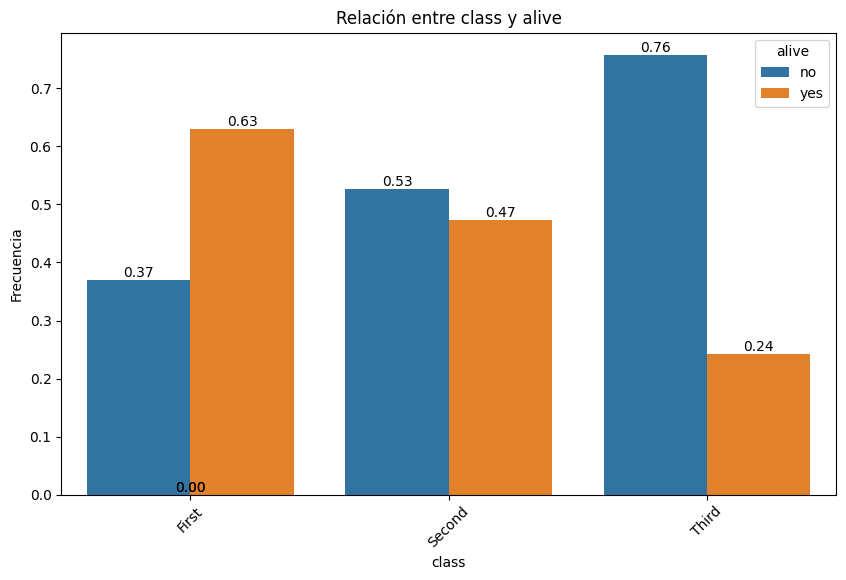

In [19]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values = True,relative_freq=True)

In [20]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["class"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


Vamos a hacer un analisis "alive"-"who" para las siguientes clases:
['Third' 'First' 'Second']


Para clase:  Third


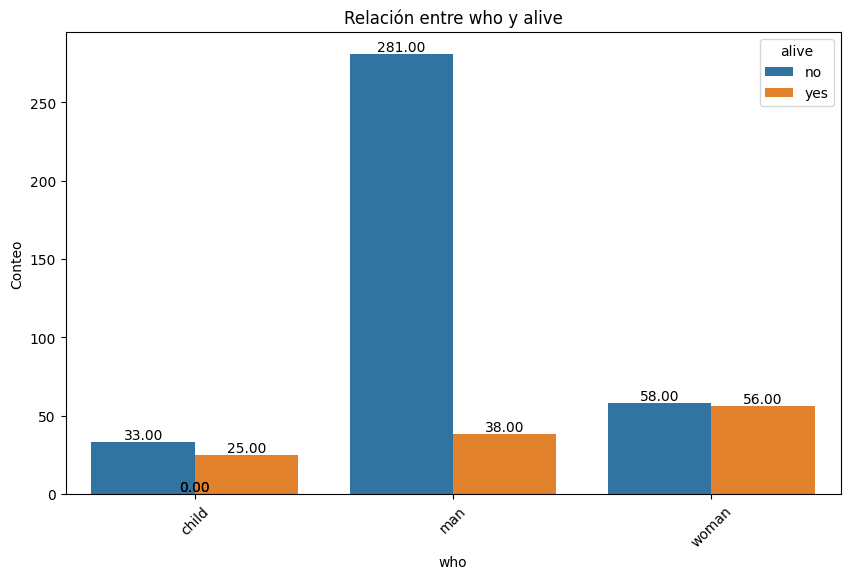

Para clase:  First


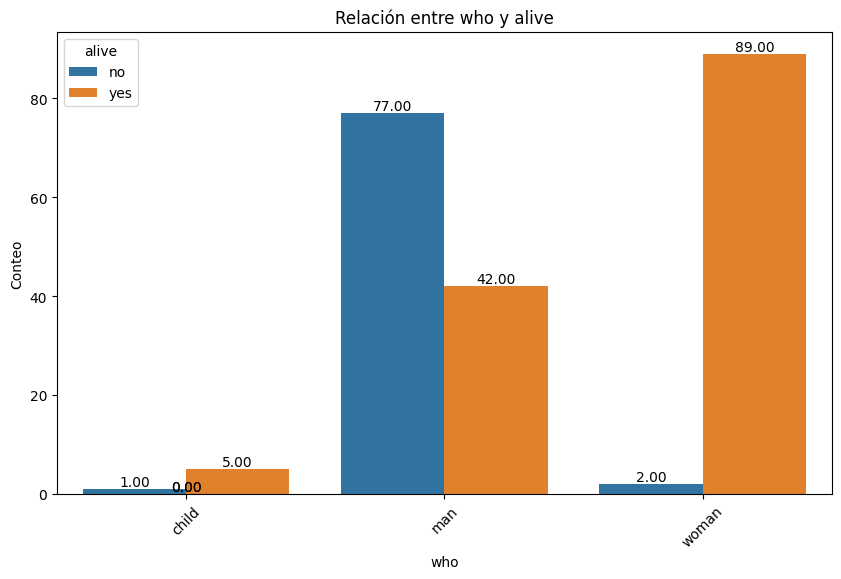

Para clase:  Second


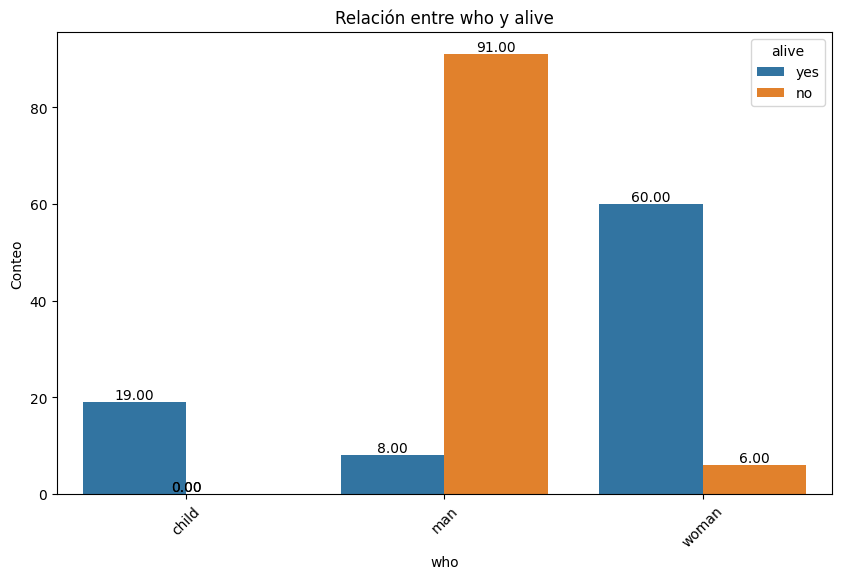

In [21]:

clases = df_titanic['class'].unique()
print(f'Vamos a hacer un analisis "alive"-"who" para las siguientes clases:')
print(clases)
print()
print()
for clase in clases:
    print('Para clase: ', clase)
    df_temp = df_titanic[df_titanic['class'] == clase]
    plot_categorical_relationship_fin(df_temp,'who','alive', relative_freq=False, show_values=True)

* En términos absolutos murieron muchos más hombres que cualquiera de los otros dos grupos*
* En términos relativos, también la mortalidad fue superior: 84% en hombres, 41% en niños y 24% en mujeres.

* El test chi2 nos dice que debemos rechazar la hipótesis nula: daba igual ser hombre mujer o niño en cuanto a expectativas de supervivencia 
* Pero otro dato interesante y que podríamos explorar en un potencial EDA es el hecho de que el grupo de los niños sufrió una mortalidad más del doble que el de las mujeres. *Mujeres y niños primero*. Hemos hecho un trivariante con clase.
* Las mujeres sobrevivieron más que los niños en terminos absolutos y SORPRESA en terminos relativos. Incorporamos clase.

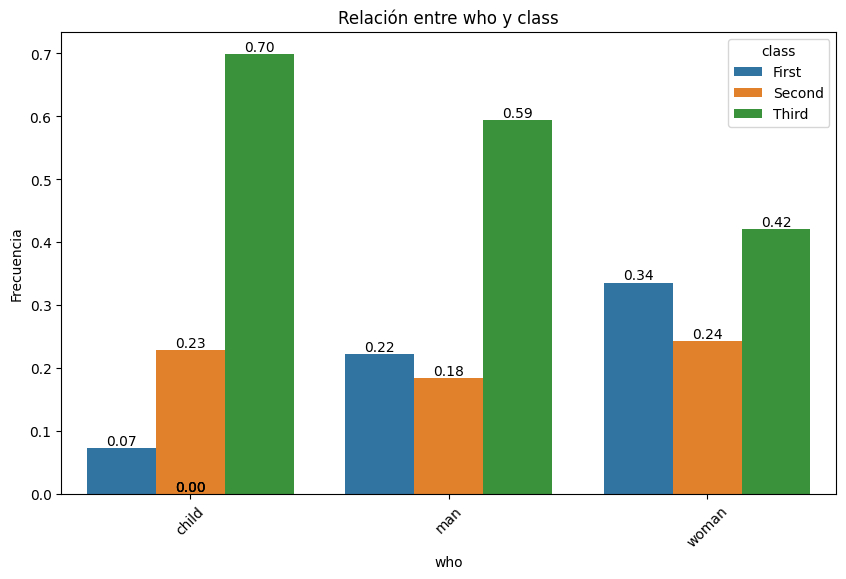

In [22]:
plot_categorical_relationship_fin(df_titanic,"who","class", relative_freq= True, show_values= True)

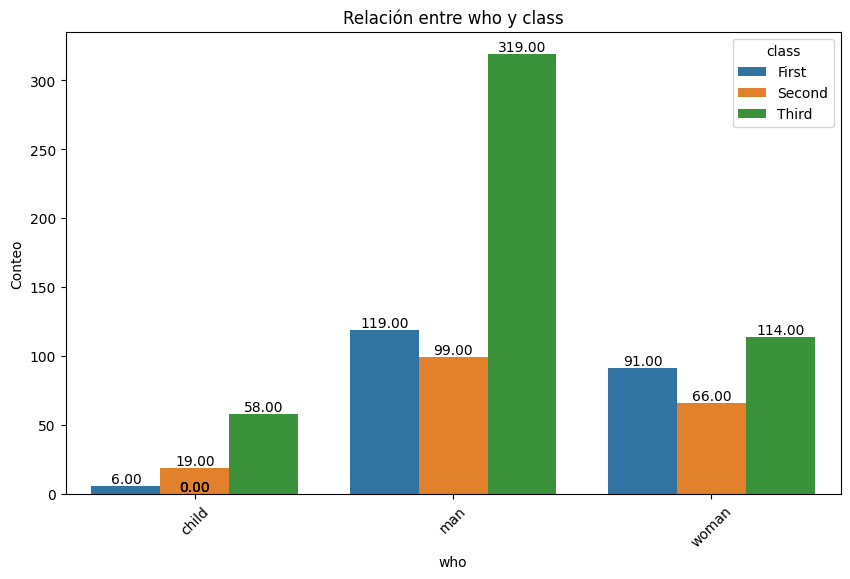

In [23]:
plot_categorical_relationship_fin(df_titanic,"who","class", show_values= True)

* La explicación de la supervivencia está en la combinación de factores who y class, de momento.
* Las mujeres y niños sobrevivieron más en general.
* También el factor clase influyó.
* Además, había muchos más niños en tercera que mujeres en tercera proprocionalmente. Por eso sobrevivieron más mujeres, porque iban en primera.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

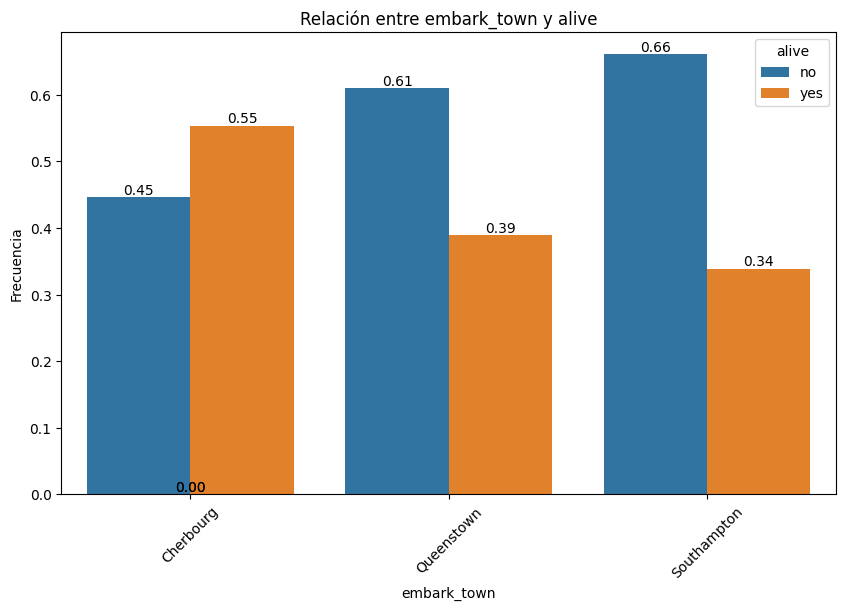

In [24]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True,relative_freq=True)

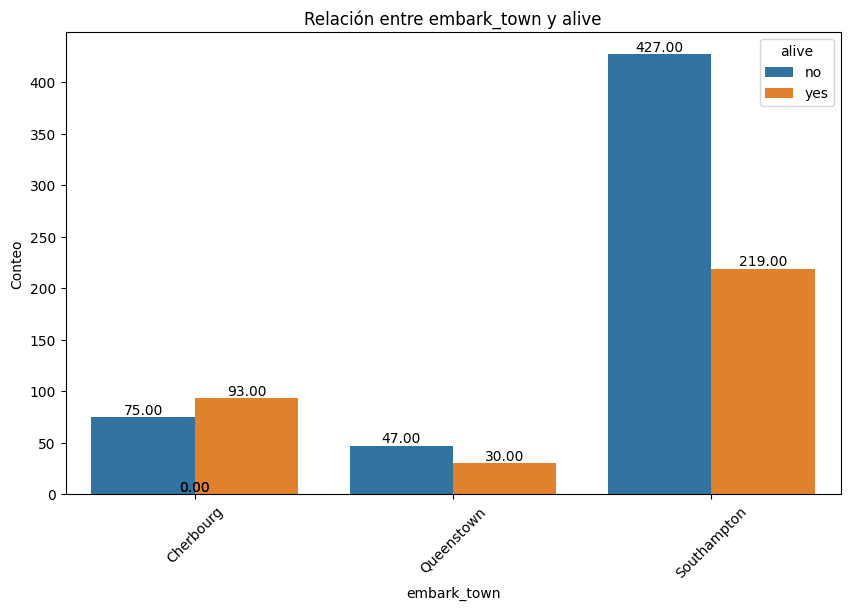

In [25]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True)

In [26]:
df_titanic.groupby('embark_town',as_index=False)['alive'].value_counts()

,embark_town,alive,count
0,Cherbourg,yes,93
1,Cherbourg,no,75
2,Queenstown,no,47
3,Queenstown,yes,30
4,Southampton,no,427
5,Southampton,yes,219


In [27]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


* ATENCIÓN: Sobrevivieron más en términos absolutos entre los que embarcaron en Southampton que los que lo hicieron en el resto de puertos!!!
* El test Chi-2 nos confirma que el puerto en el que embarcaron influyó en si sobrevivieron o no.
* ¿Puede que algunos puertos tengan mal de ojo?
* O puede ser que este sesgo (diferencia) venga motivado por otros factores, como que embarcaron más hombres en Southampton o más gente en tercera clase
* Lo comprobamos

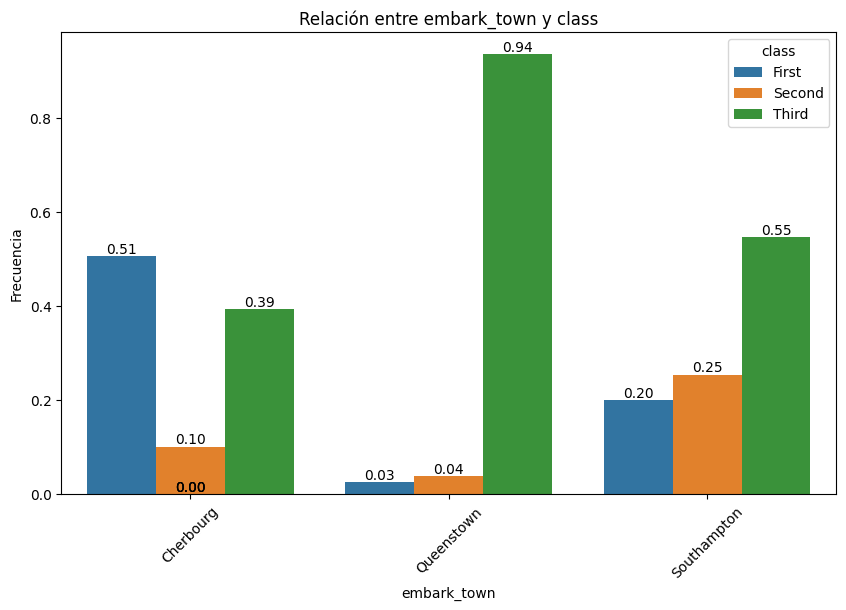

In [28]:
plot_categorical_relationship_fin(df_titanic, "embark_town","class", relative_freq= True, show_values= True)

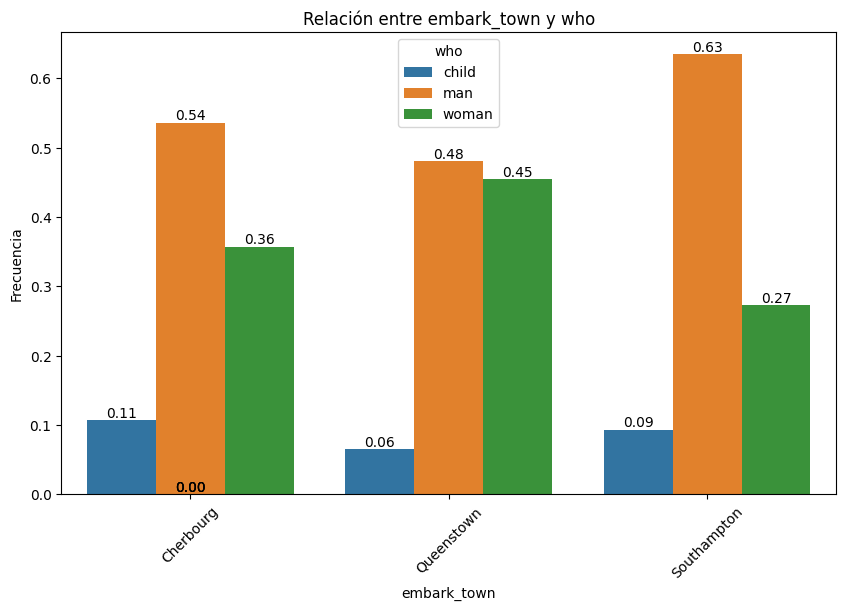

In [29]:
plot_categorical_relationship_fin(df_titanic, "embark_town","who", relative_freq= True, show_values= True)

* Viendo esas dos gráficas ànteriores parece explicarse todo.
* En Cherbourg la proporción de pasajeros de primera es mayor bastante mayor que en los otros dos puertos. 
* Y la diferencia entre los ratios de Queenstown y de Southampton podría explicarse por el ratio de mujeres que embarcaron en una y otra ciudad. 
* CONCLUSIÓN: más que magia en el origen, el ser mujer y la clase influye mucho como para enmascarar esta relación. 
* ¿Qué deberíamos hacer para hacerla desaparecer matemáticamente?*

* Fijamos los valores who y class y vemos si existe relación entre embark_town y alive. Eso se llama controlar por esas variables. Quitamos su influencia.
* Si realmente no hay relación entre ellos salvo la debida a la clase del pasaje y al tipo de pasajero saldrá que son independientes para cada combinación

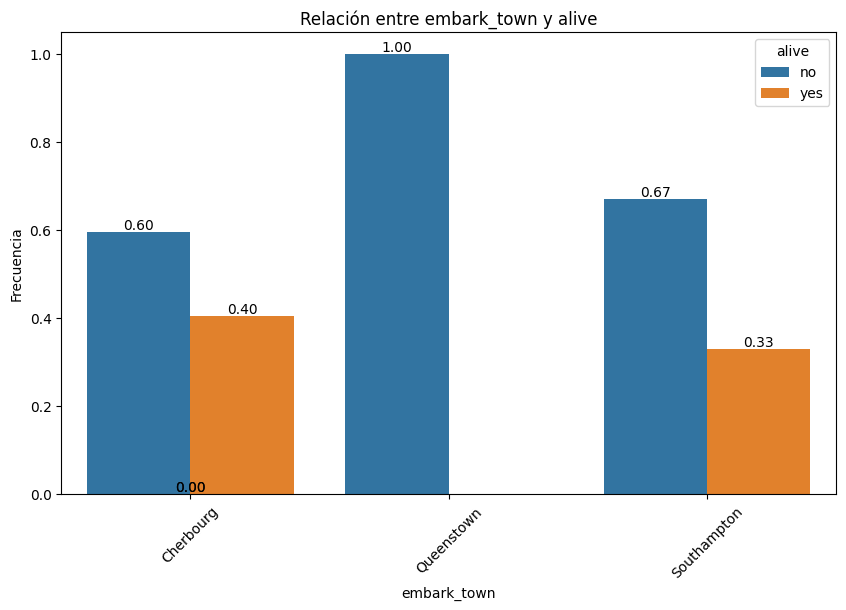

In [30]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

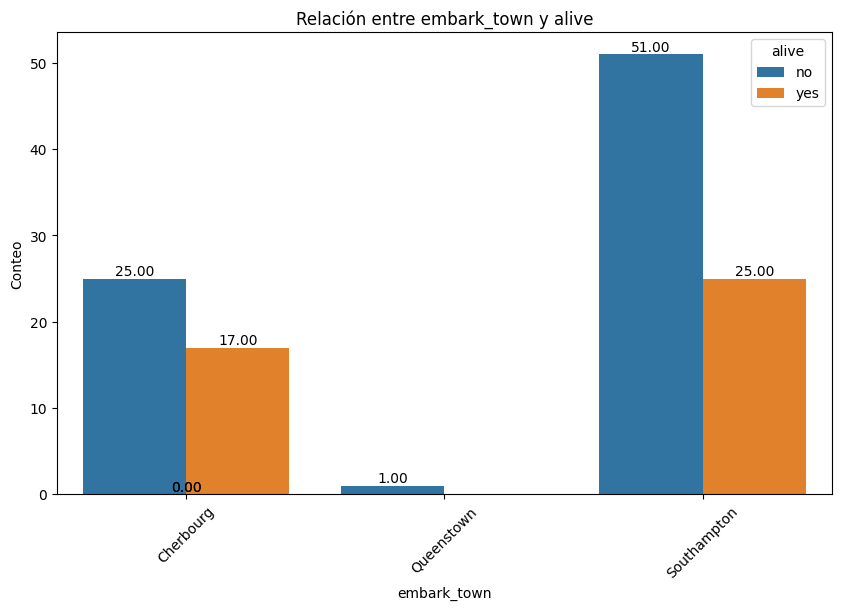

In [31]:
plot_categorical_relationship_fin(df_test,"embark_town","alive", show_values= True)

In [32]:
tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1.2309087111718686
P-Value: 0.5403953078947801
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[27.17647059  0.64705882 49.17647059]
 [14.82352941  0.35294118 26.82352941]]


### Ahora fijamos clase y who en subdatasets: 3 categorías de who x 3 categorías de clase: 9 plots y 9 chi-2

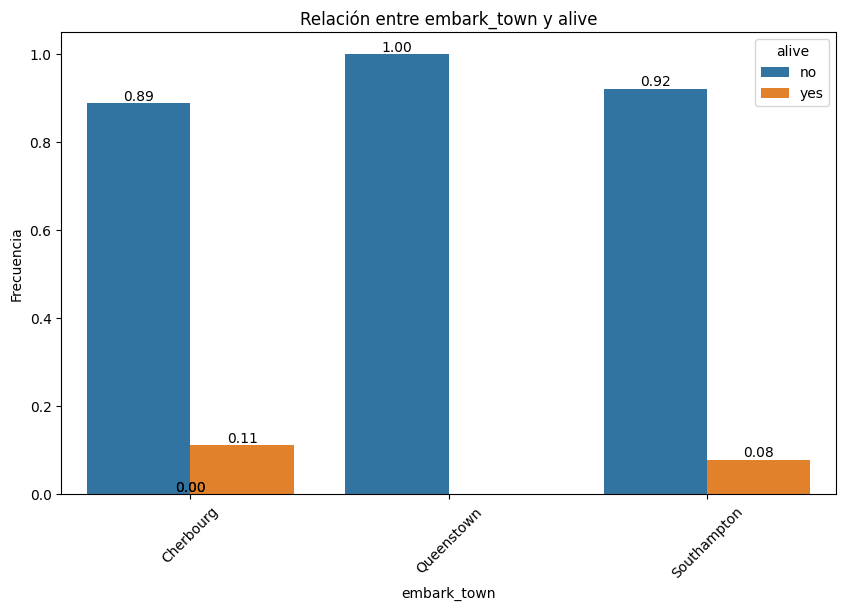

Valor Chi-Cuadrado: 0.20474749969131997
P-Value: 0.9026921075770808
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[8.27272727e+00 9.19191919e-01 8.18080808e+01]
 [7.27272727e-01 8.08080808e-02 7.19191919e+00]]


In [33]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "Second")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

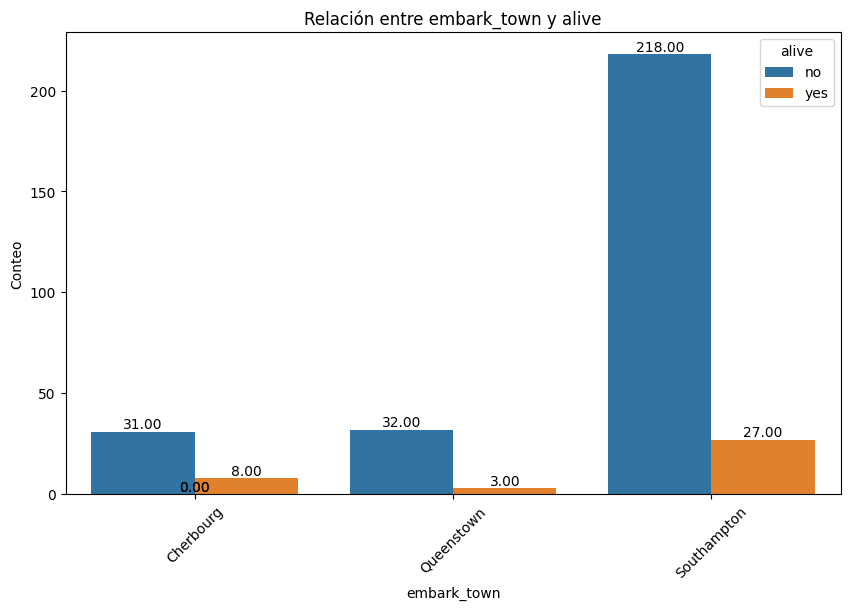

Valor Chi-Cuadrado: 3.3072128132305267
P-Value: 0.1913585459765817
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 34.35423197  30.830721   215.81504702]
 [  4.64576803   4.169279    29.18495298]]


In [57]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= False, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

### Haríamos lo mismo para todas las combinaciones de who y de class: 9 tablas de contingencia, menos las 3 que ya hemos hecho para hombres en cualquier clase.
#### Por motivos de espacio y tiempo, a continuación se muestran sólo las combinaciones para las que no se puede rechazar la hipótesis nula de que embark_town no influye en alive.
#### Es decir, os mostramos las gráficas y la chi-2 de lo que sorprende, de que el puerto de embarque tenga una influencia remanente sobre la supervivencia. 

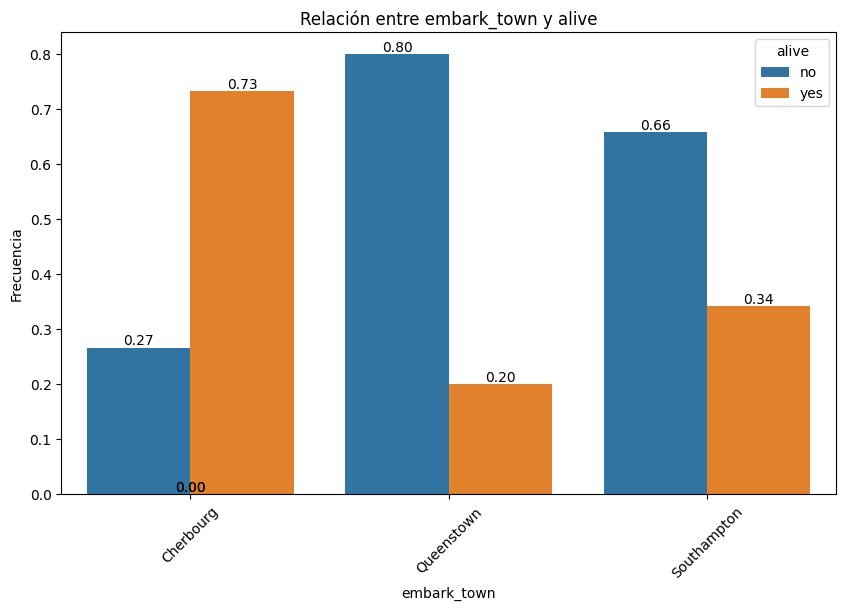

Valor Chi-Cuadrado: 7.903047315257843
P-Value: 0.019225386540995867
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 8.53448276  2.84482759 21.62068966]
 [ 6.46551724  2.15517241 16.37931034]]


In [35]:
df_test = df_titanic.loc[(df_titanic.who == "child") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

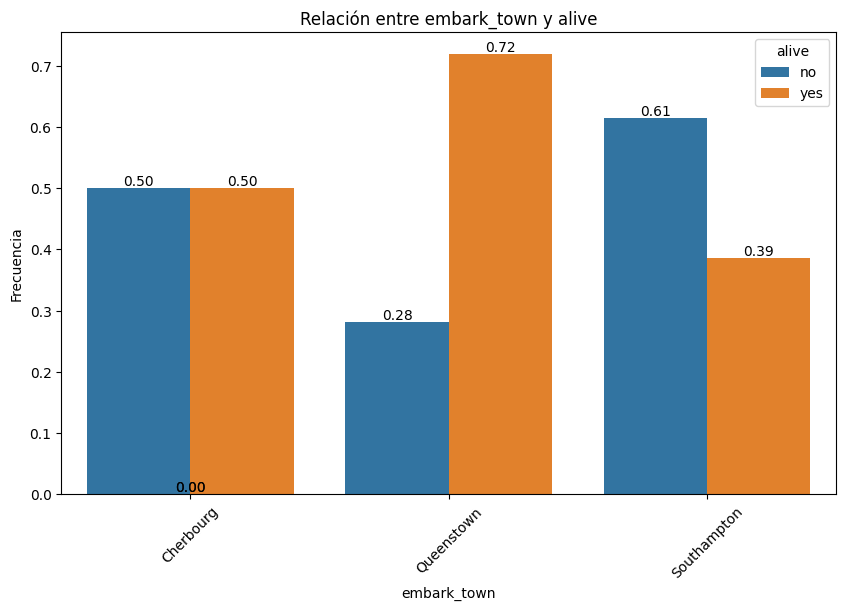

Valor Chi-Cuadrado: 9.750056078465867
P-Value: 0.007634880139676012
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 6.10526316 16.28070175 35.61403509]
 [ 5.89473684 15.71929825 34.38596491]]


In [36]:
df_test = df_titanic.loc[(df_titanic.who == "woman") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

* Hemos explicado la dependencia aparente entre embark town y supervivencia controlando por clase y who. Para las 7 de las 9 combinaciones, el chi-2 nos dice que embark_town no tiene influencia sobre alive.
* Sin embargo, para los grupos de mujeres y de niños de tercera clase, sí queda una dependencia entre embark_town y alive. 
* A estudiar más a fondo en un EDA. 
* Nuevas hipotesis.
* Controlar por otros factores y repetir. 
* Al final, puede que no lo consigamos explicar. Tal vez la explicación estaba en la variable "deck" que hemos eliminado.

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


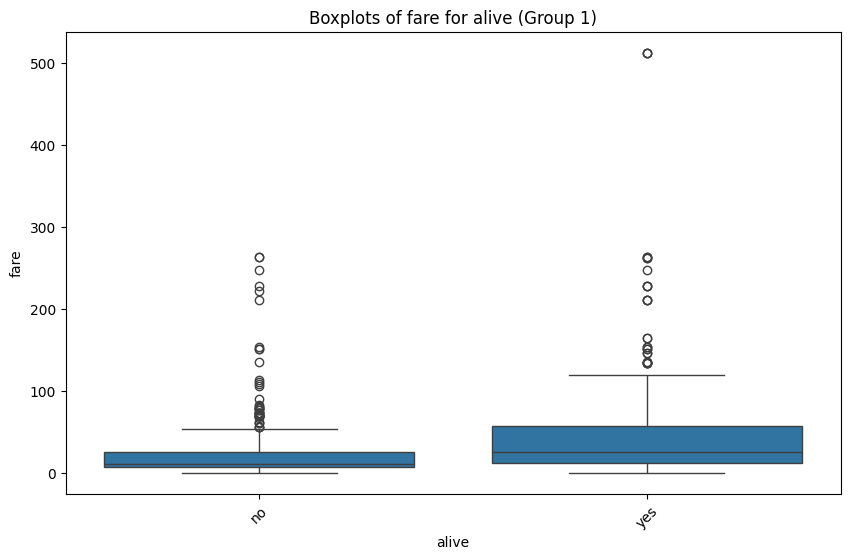

In [37]:
plot_grouped_boxplots(df_titanic,"alive","fare")

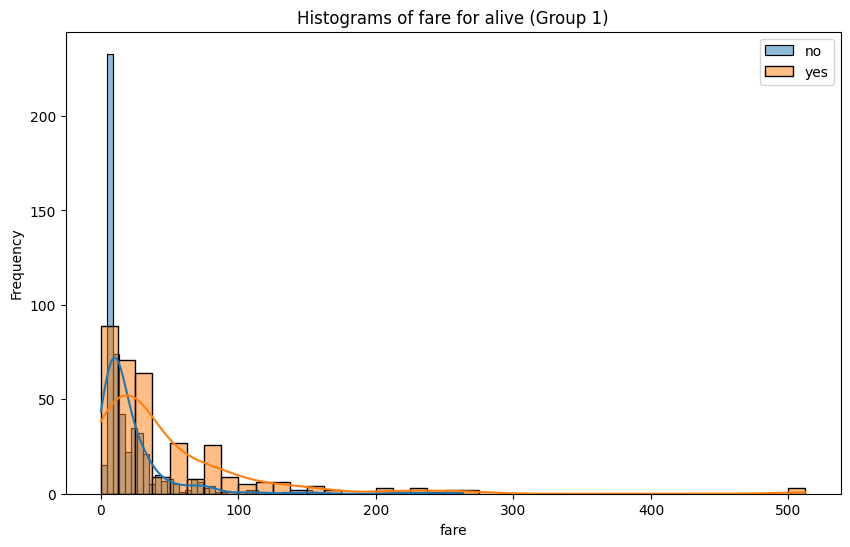

In [38]:
plot_grouped_histograms(df_titanic, "alive","fare", group_size = 2)

In [39]:
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


* Visualmente parece que si hay influencia
* El test U de Mann-Whitney nos dice que sí hay relación
* Seguramente está relacionado con la clase

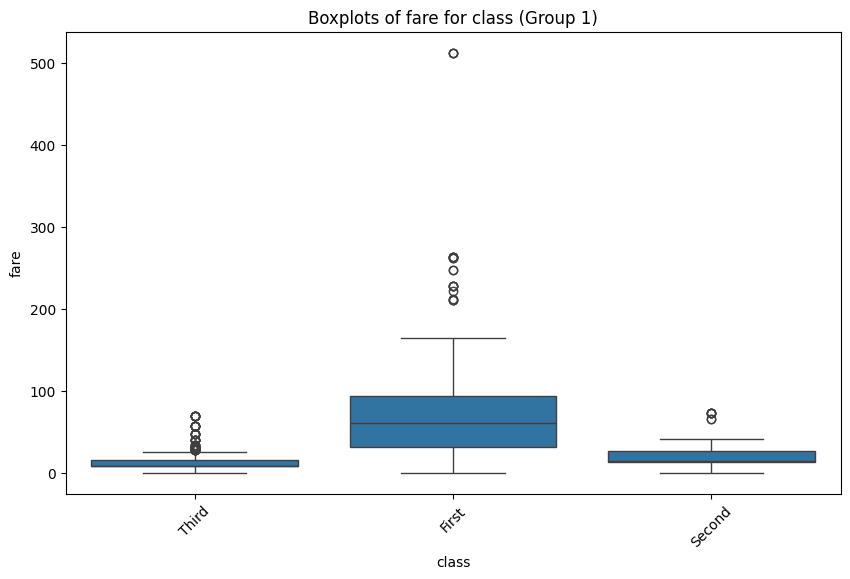

In [40]:
plot_grouped_boxplots(df_titanic,"class","fare")

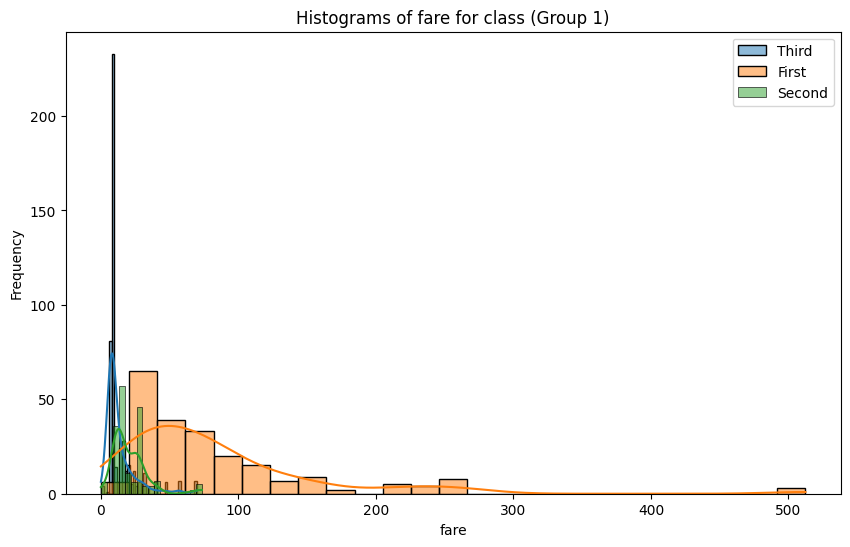

In [41]:
plot_grouped_histograms(df_titanic,"class","fare", group_size = 3)

* El histograma comparado de precios y clases, da que pensar en si se podría hacer un bin en fare
* Si existiese relevancia estadística con el fare (binned) podríamos decir que el precio es lo que salvó, independientemente de la clase
* Si se diera este caso, tendríamos que concluir: no era la clase sino el precio el que te daba mejor cabina

### Ahora hacemos dos grupos para estudiar sus características. En este caso "Fare". 

In [42]:
df_alive = df_titanic.loc[df_titanic.alive == "yes"].copy()
df_dead = df_titanic.loc[df_titanic.alive == "no"].copy()

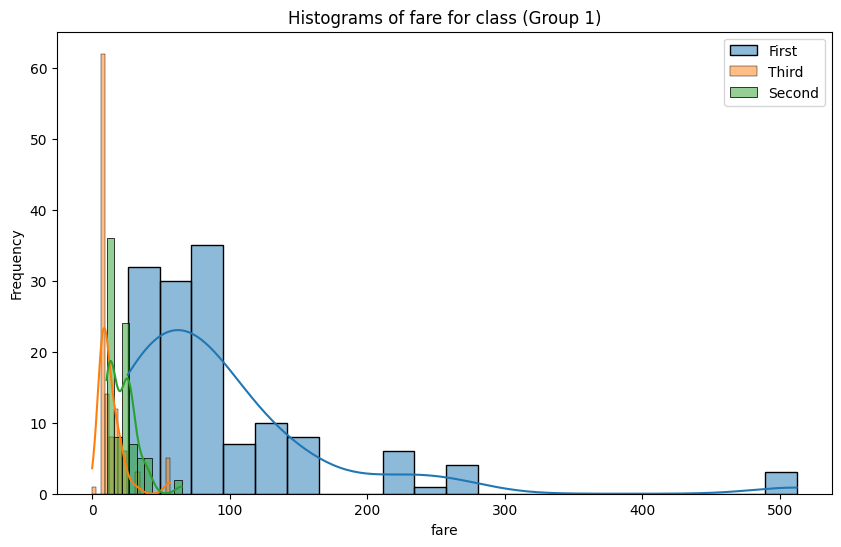

In [43]:
plot_grouped_histograms(df_alive,"class","fare", group_size = 3)

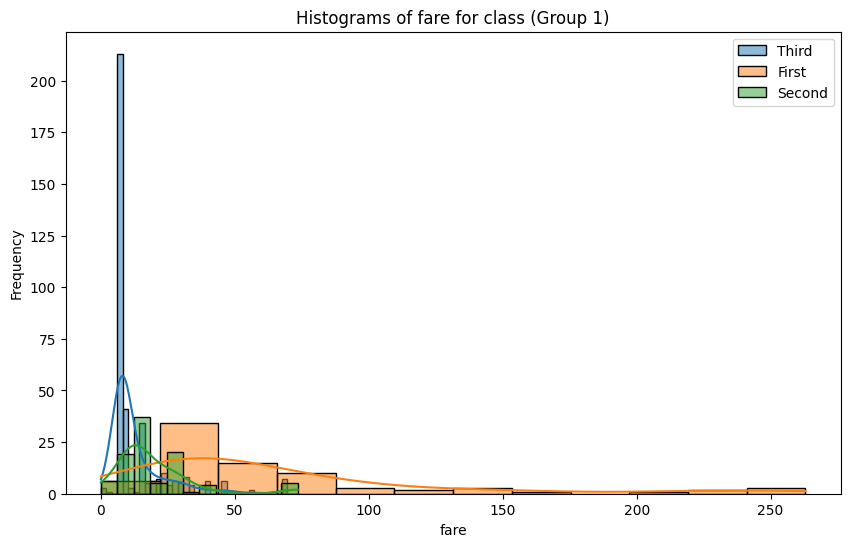

In [44]:
plot_grouped_histograms(df_dead,"class","fare", group_size = 3)

* CONCLUSIONES: El precio influyó en la supervivencia. 

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?


In [45]:
df_titanic.loc[df_titanic.fare == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [46]:
df_titanic.loc[df_titanic.fare == 0 ,'class'].value_counts()

class
Second    6
First     5
Third     4
Name: count, dtype: int64

In [47]:
df_titanic.loc[df_titanic.fare == df_titanic.fare.max()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.


In [48]:
def trivariant_analysis(df, directora, cat2, num1, group_size = 3, bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_grouped_histograms(df_datos,col_1,col_2, group_size= group_size)

Respuesta Southampton:


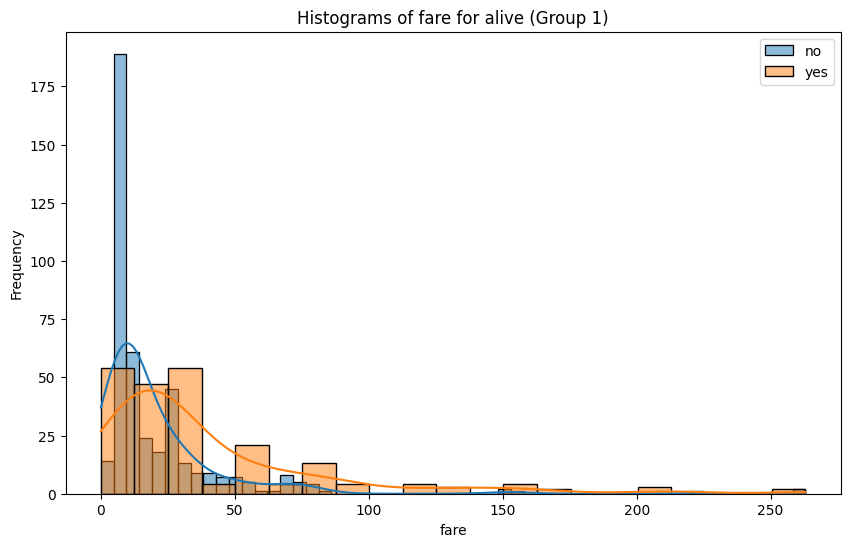

Respuesta Cherbourg:


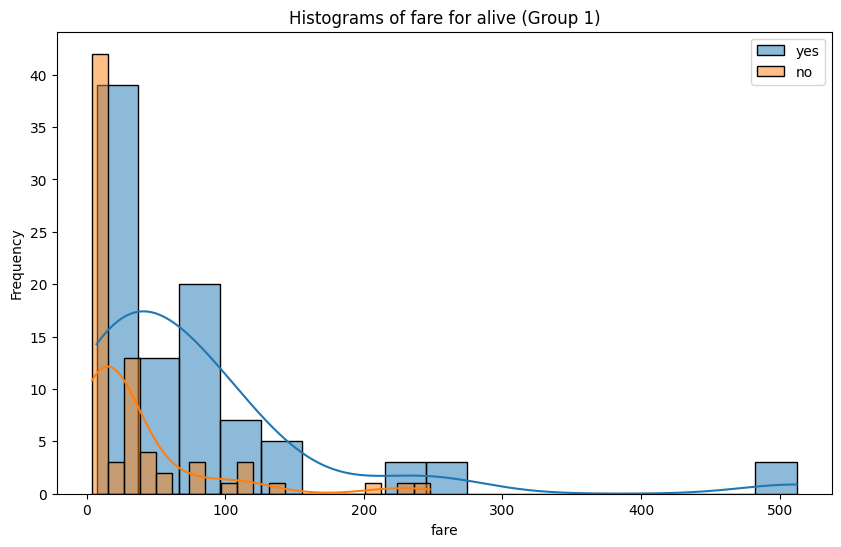

Respuesta Queenstown:


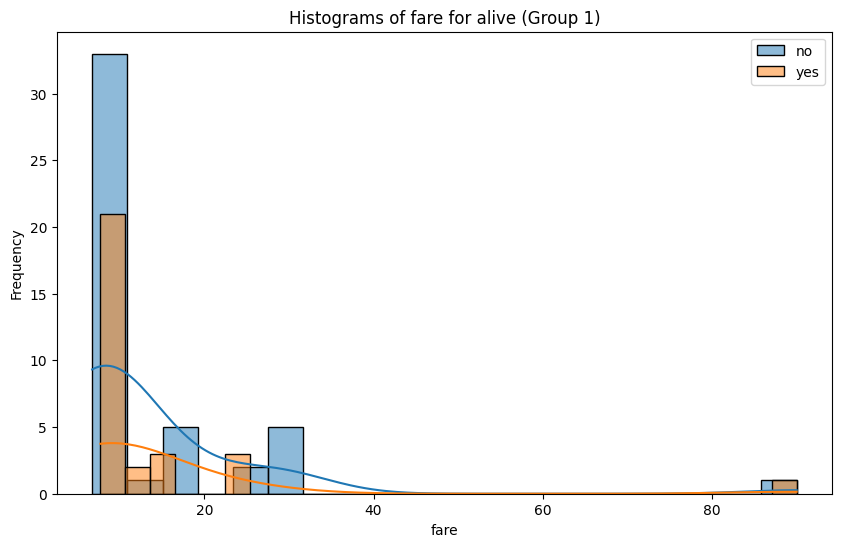

In [49]:
trivariant_analysis(df_titanic, "embark_town","alive","fare", 2, 30)

### Tendría sentido categorizar fare y 4 o 5 categorías y hacer el análsis entre categóricas entre fare_cat y alive.

### ¿Qué ocurre con la edad? Tiene influencia sobre la supervivencia. Vamos a estudiarlo segmentando la variable age en age_cat.

(2,)


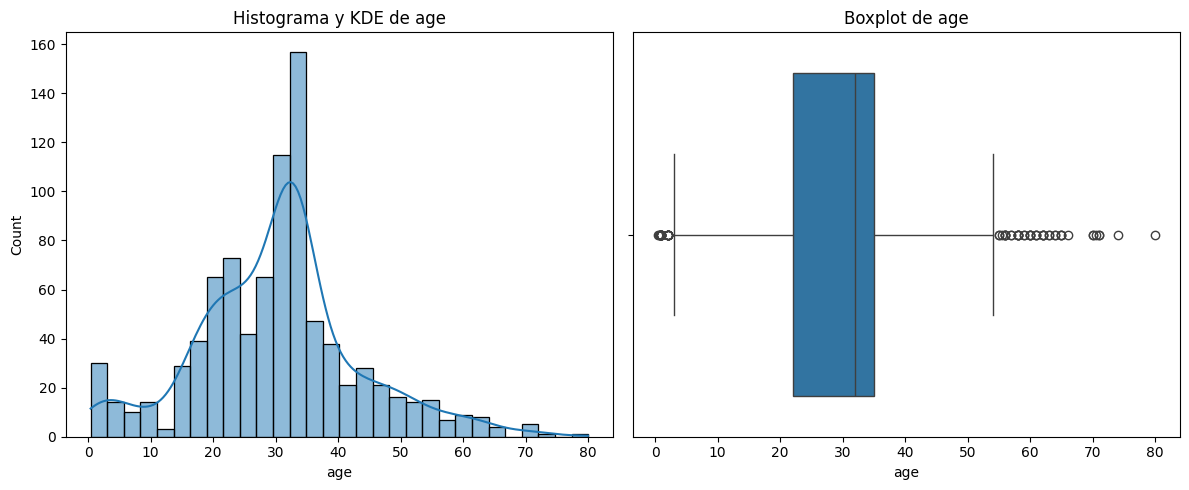

In [50]:
plot_combined_graphs(df_titanic,["age"])

In [51]:
df_titanic.age.describe()

count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [52]:
# Escojo cuartiles como límites:
bins = [0,22,32,35,80]
df_titanic["cat_age"] = pd.cut(df_titanic.age, bins = bins, labels = ["age_1","age_2","age_3","age_4"])

Para intervalo de edad age_1


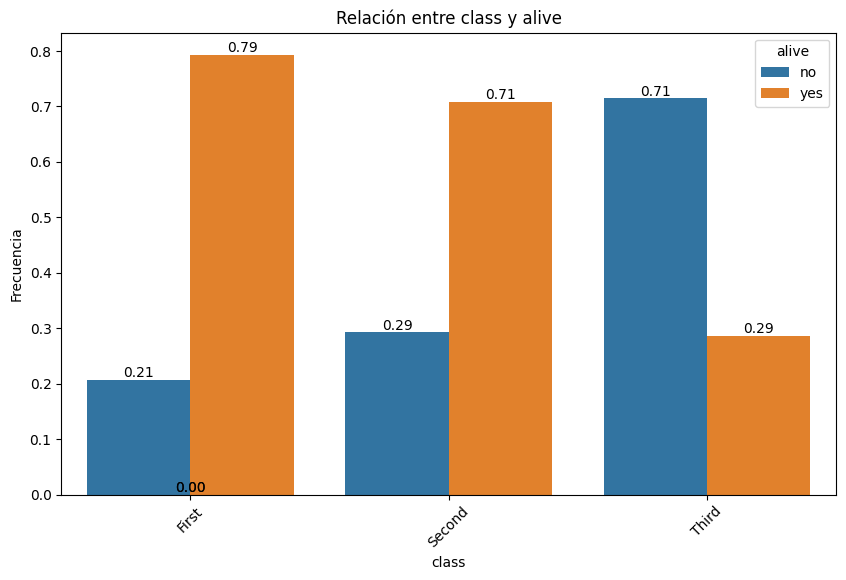

Para intervalo de edad age_2


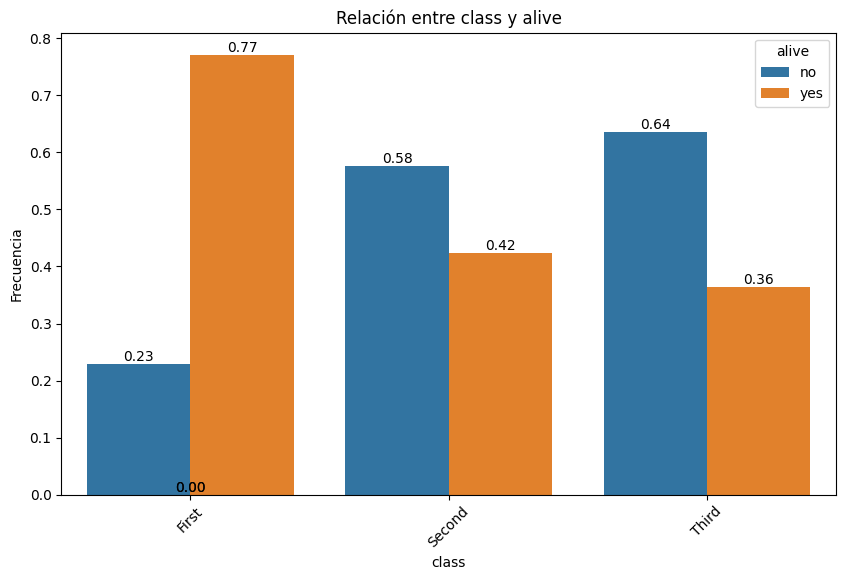

Para intervalo de edad age_3


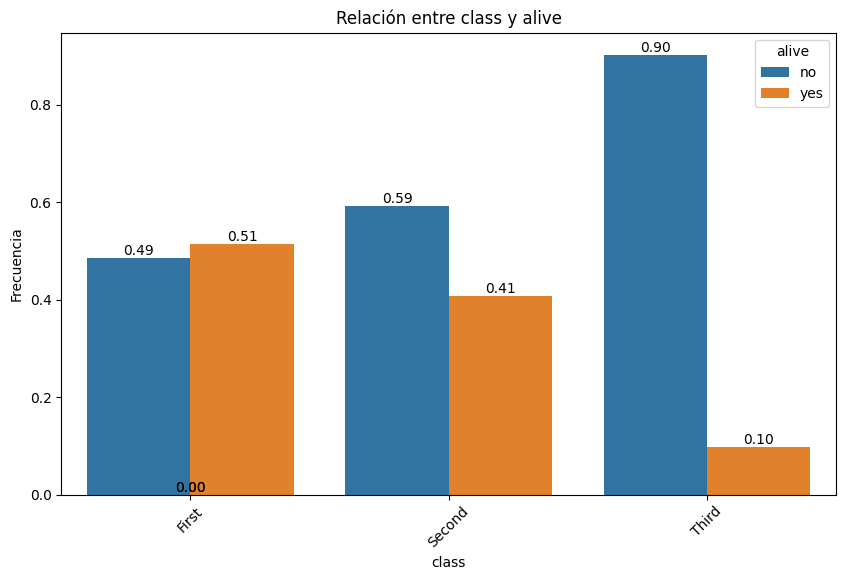

Para intervalo de edad age_4


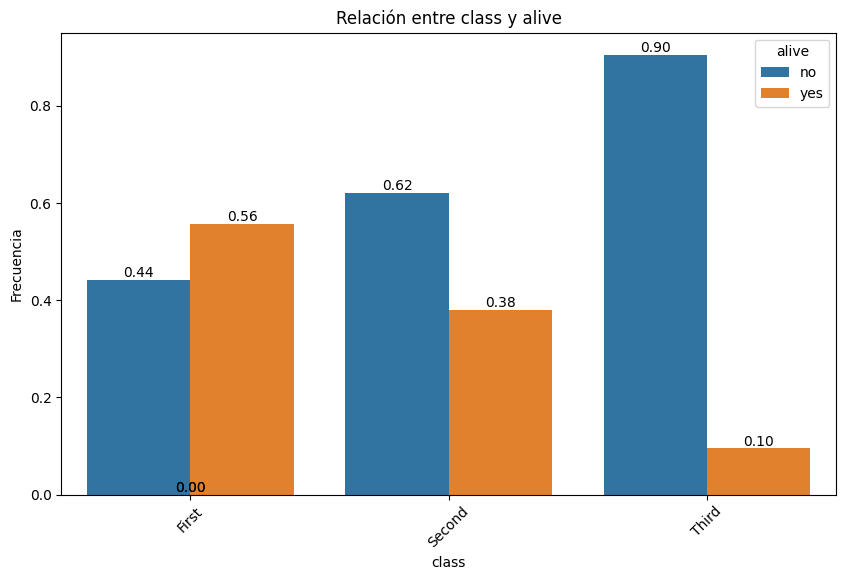

In [53]:
for bin in ['age_1','age_2','age_3','age_4']:
    df_temp = df_titanic[df_titanic['cat_age']== bin ]
    print('Para intervalo de edad',bin)
    plot_categorical_relationship_fin(df_temp,'class','alive',show_values=True,relative_freq=True)

c:\Users\34632\TheBridge\Feb24_repos\COLISEO\Repaso - Soluciones\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


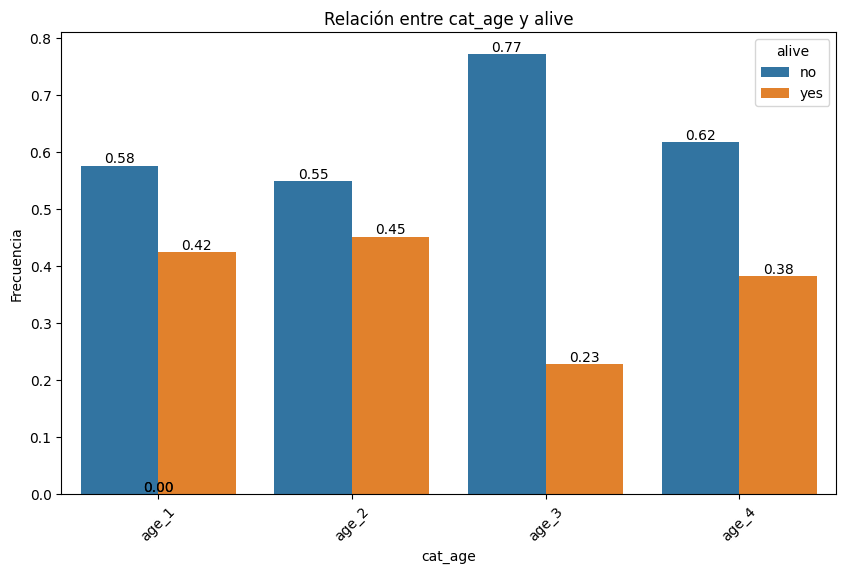

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


In [54]:
#df_test = df_titanic.loc[(df_titan].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_titanic,"cat_age","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

### Concluimos que la edad tuvo un peso en la supervivencia.

* Hemos comprobado que cat_age influye en la supervivencia
* En términos relativos, la combinación cat_age_1 con Primera clase, es decir menores de 22 en primera clase, es la que mayor ratio de supervivencia presenta
* Los mayores de 35 (cat_age_3 y cat_age_4 conjuntamente) de tercera clase la que peor ratio de supervivencia tiene

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

Para alive? yes


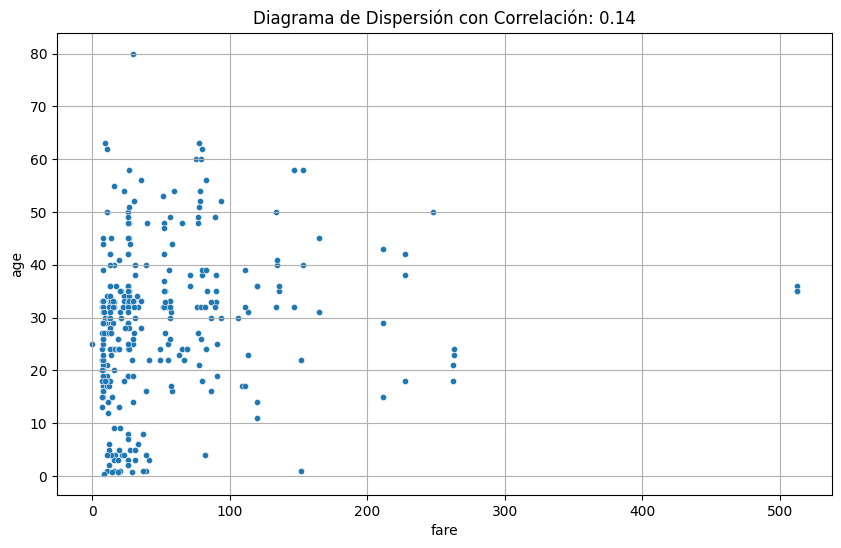

Para alive? no


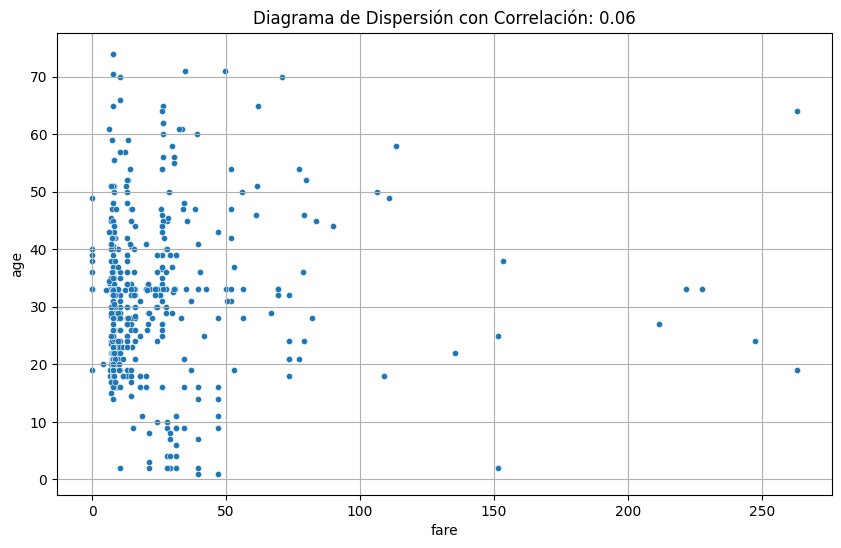

In [55]:
for bin in ['yes','no']:
    df_temp = df_titanic[df_titanic['alive']== bin ]
    print('Para alive?',bin)
    grafico_dispersion_con_correlacion(df_temp,'fare','age', tamano_puntos=20, mostrar_correlacion= True)

* No se ve una correlación entre edad y el precio del billete independientemente de si se salvaron o no
* Esto no quiere decir que entre supervivencia y precio y entre superviviecia y edad no hay cierta relación
* Esas relaciones estarían provocadas por la supervivencia superior en mujeres y niños, y en los pasajeros de primera y segunda clase
* Se podría hacer un chequeo rápido a las medias y, más en profundidad, habría que hacer los test correspondientes
* Lo dejaríamos para el EDA


Matriz de correlación:
                     age      fare  family_members
age             1.000000  0.080765       -0.253921
fare            0.080765  1.000000        0.217138
family_members -0.253921  0.217138        1.000000


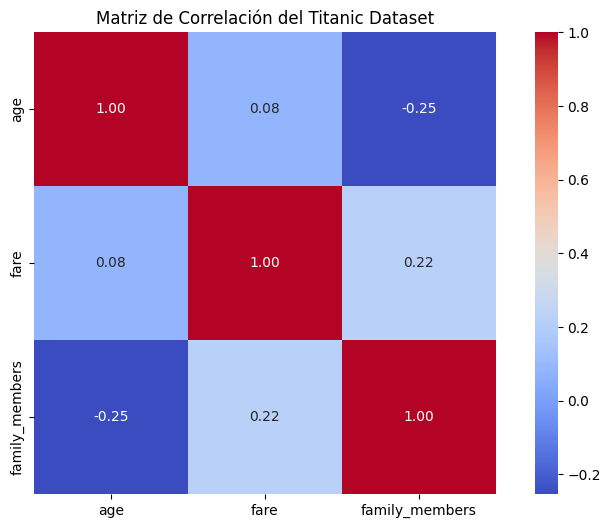

In [56]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_titanic.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación:")
print(correlation_matrix)

# Opcional: Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Matriz de Correlación del Titanic Dataset")
plt.show()